In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
raw_data_path = os.path.join(os.path.pardir, 'data','raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [3]:
train_df = pd.read_csv(train_file_path , index_col='PassengerId')

In [4]:
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [5]:
type(train_df)

pandas.core.frame.DataFrame

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
test_df['Survived'] = -888

In [8]:
df = pd.concat((train_df, test_df ),axis=0,sort=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [10]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [11]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [12]:
print('Mean Fare :{0}'.format(df.Fare.mean()))

Mean Fare :33.2954792813456


In [13]:
df.Age.plot(kind='kde',color='c')

In [14]:
%matplotlib inline

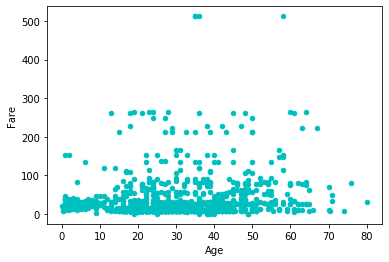

In [15]:
df.plot.scatter(x='Age',y='Fare',color ='c');

In [16]:
df.groupby(['Pclass']).agg({'Age' : 'mean', 'Fare' : 'median'})

,Age,Fare
Pclass,,
1,39.159930,60.0000
2,29.506705,15.0458
3,24.816367,8.0500


In [17]:
aggregations = {
    'Fare' : {
        'mean_Fare' : 'mean',
        'median_Fare' : 'median',
        'max_fare' : max,
        'min_fare' : np.min
    }
}

In [18]:
df.groupby(['Pclass']).agg(aggregations)

C:\Users\KISHORE\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


Fare                               
        mean_Fare median_Fare  max_fare min_fare
Pclass                                          
1       87.508992     60.0000  512.3292      0.0
2       21.179196     15.0458   73.5000      0.0
3       13.302889      8.0500   69.5500      0.0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [20]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [21]:
pd.crosstab(df[df.Survived!=-888]['Embarked'],df[df.Survived!= -888].Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [22]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [23]:
df.Embarked.fillna('C', inplace=True)

In [24]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [26]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [27]:
median_fare = df.loc[(df.Pclass==3) & (df.Embarked=='S'),'Fare' ].median()

In [28]:
print(median_fare)

8.05


In [29]:
df.Fare.fillna(median_fare, inplace=True)

In [30]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [31]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-888,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-888,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236


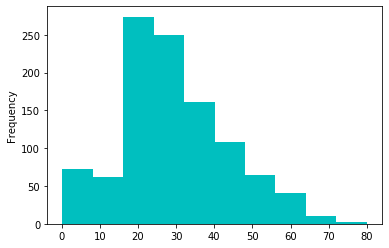

In [32]:
df.Age.plot(kind='hist',color ='c')

In [33]:
df.Age.mean()

29.881137667304014

In [34]:
df.Age.median()

28.0

In [35]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

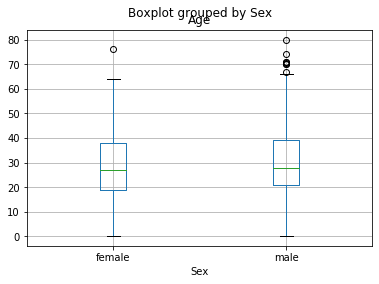

In [36]:
df[df.Age.notnull()].boxplot('Age','Sex')

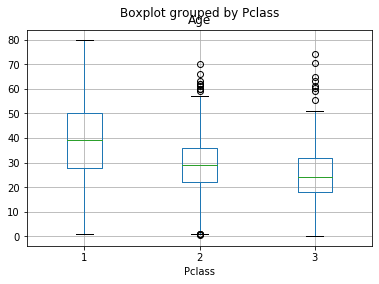

In [37]:
df[df.Age.notnull()].boxplot('Age','Pclass')

In [38]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [39]:
def get_title(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

    

In [40]:
df.Name.map(lambda x: get_title(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [41]:
def get_title(name):
    title_group = {
        'mr' : 'Mr',
        'mrs' : 'Mrs',
        'miss' : 'Miss',
        'master' : 'Master',
        'don' : 'Sir',
        'rev' : 'Sir',
        'dr' : 'Officer',
        'mme' : 'Mrs',
        'ms' : 'Mrs',
        'major' : 'Officer',
        'lady' : 'Lady',
        'sir' : 'Sir',
        'mlle' : 'Miss',
        'col' : 'Officer',
        'capt' : 'Officer',
        'the countess' : 'Lady',
        'jonkheer' : 'Sir',
        'dona' : 'Lady'
        
    }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [42]:
df['Title'] = df.Name.map(lambda x : get_title(x))

In [43]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


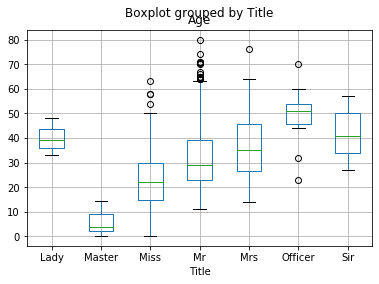

In [44]:
df[df.Age.notnull()].boxplot('Age','Title');

In [45]:
missing_age = df.groupby('Title').Age.transform('median')
df.Age.fillna(missing_age , inplace=True)

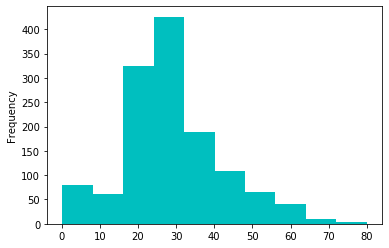

In [46]:
df.Age.plot(kind='hist',color='c',bins=10)

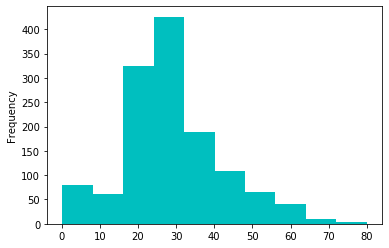

In [47]:
df.Age.plot(kind='hist',color='c',bins=10)

In [48]:
df.loc[df.Age > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


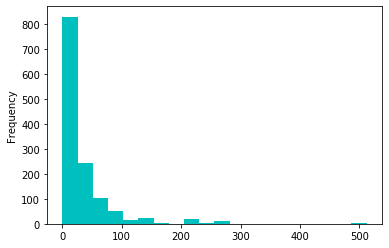

In [49]:
df.Fare.plot(kind='hist',color = 'c', bins = 20)

In [50]:
df[df.Fare>=500]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


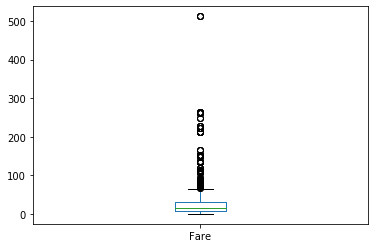

In [51]:
df.Fare.plot(kind = 'box')

In [52]:
df[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


In [53]:
LogFare = np.log(df.Fare + 1)

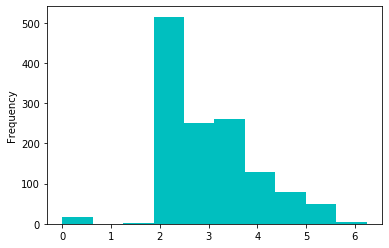

In [54]:
LogFare.plot(kind= 'hist', color ='c')

In [55]:
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [56]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

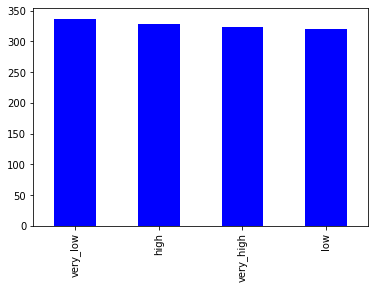

In [57]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar',color='b')

In [58]:
df['Fare_bin']=pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

In [59]:
df['Age_State'] = np.where(df['Age']>=18, 'Adult','Child')

In [60]:
df['Age_State'].value_counts()

Adult    1147
Child     162
Name: Age_State, dtype: int64

In [61]:
pd.crosstab(df[df.Survived!= -888].Survived, df[df.Survived!= -888].Age_State )

Age_State,Adult,Child
Survived,,
0,495,54
1,279,63


In [62]:
df['Family_Size'] = df.Parch + df.SibSp + 1

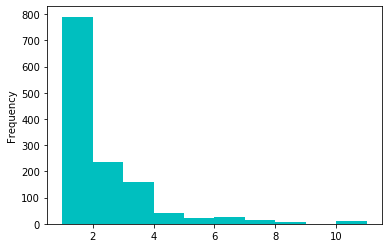

In [63]:
df['Family_Size'].plot(kind = 'hist', color ='c')

In [64]:
df[df['Family_Size'] == df.Family_Size.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_bin,Age_State,Family_Size
PassengerId,,,,,,,,,,,,,,,
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,Master,very_high,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
847,29.0,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
864,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,Miss,very_high,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,Mr,very_high,Adult,11


In [65]:
pd.crosstab(df[df.Survived!= -888].Survived, df[df.Survived!= -888].Family_Size )

Family_Size,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [66]:
df['IsMother'] = np.where(((df.Parch>0) & (df.Title != 'Miss') & (df.Sex=='female') & (df.Age>18)), 1,0)

In [67]:
pd.crosstab(df[df.Survived!= -888].Survived, df[df.Survived!= -888].IsMother )

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [68]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [69]:
df.loc[df.Cabin == 'T' , 'Cabin'] = np.NaN

In [70]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin) , str(cabin)[0].upper(),'Z')

In [71]:
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [72]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [73]:
pd.crosstab(df[df.Survived!= -888].Survived, df[df.Survived!= -888].Deck )

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [74]:
df['IsMale'] = np.where(df['Sex']=='male', 1,0)

In [75]:
df = pd.get_dummies(df,columns = ['Deck','Pclass','Title','Fare_bin','Embarked','Age_State'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
Family_Size           1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

In [77]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis = 1, inplace = True)

In [78]:
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns 
df = df[columns]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
Family_Size           1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

In [80]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')


In [81]:
df.loc[df.Survived!= -888].to_csv(write_train_path)
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888 , columns].to_csv(write_test_path)

In [82]:
train_file_path = os.path.join(processed_data_path , 'train.csv')
test_file_path = os.path.join(processed_data_path,'test.csv')

In [83]:
train_df = pd.read_csv(train_file_path , index_col = 'PassengerId')
test_df = pd.read_csv(test_file_path , index_col = 'PassengerId')

In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 33 columns):
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
Family_Size           891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-null int64
Title_Mrs             891 non-

In [85]:
X = train_df.loc[:,'Age':].as_matrix().astype('float')
Y = train_df.Survived.ravel()

C:\Users\KISHORE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [86]:
print (X.shape , Y.shape)

(891, 32) (891,)


In [87]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2 , random_state = 0)
print (X_train.shape , Y_train.shape)
print (X_test.shape , Y_test.shape)

(712, 32) (712,)
(179, 32) (179,)


In [88]:
import sklearn

In [89]:
sklearn.__version__

'0.21.3'

In [90]:
from sklearn.dummy import DummyClassifier

In [91]:
model_dummy = DummyClassifier(strategy = 'most_frequent', random_state = 0)

In [92]:
model_dummy.fit(X_train,Y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [93]:
test_X = test_df.as_matrix().astype('float')

C:\Users\KISHORE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [94]:
predictions = model_dummy.predict(test_X)

In [95]:
df_submission = pd.DataFrame({'PassengerId' : test_df.index, 'Survived' : predictions})

In [96]:
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [97]:
submission_data_file=os.path.join(os.path.pardir,'data','external')
submission_file_path = os.path.join(submission_data_file, '01_dummy.csv')

In [98]:
df_submission.to_csv(submission_file_path,index =False)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
model_lr_1 = LogisticRegression(random_state = 0)

In [101]:
model_lr_1.fit(X_train , Y_train)

C:\Users\KISHORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
submission_data_file=os.path.join(os.path.pardir,'data','external')
submission_file_path = os.path.join(submission_data_file, '02_lreg.csv')

In [103]:
predictions = model_lr_1.predict(test_X)

In [104]:
df_submission = pd.DataFrame({'PassengerId' : test_df.index, 'Survived' : predictions})

In [105]:
df_submission.to_csv(submission_file_path,index =False)

In [106]:
model_lr = LogisticRegression(random_state = 0)

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
params = {'C' : [1.0,10.0,50.0,100.0,1000.0] , 'penalty' : ['l1' , 'l2']}
clf = GridSearchCV(model_lr , param_grid = params , cv =3)

In [109]:
clf.fit(X_train,Y_train)

C:\Users\KISHORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KISHORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KISHORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KISHORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KISHORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [110]:
print ('best score : {0:.2f}'.format(clf.score(X_test,Y_test)))

best score : 0.83


In [111]:
submission_data_file=os.path.join(os.path.pardir,'data','external')
submission_file_path = os.path.join(submission_data_file, '03_lreg.csv')

In [112]:
predictions = clf.predict(test_X)

In [113]:
df_submission = pd.DataFrame({'PassengerId' : test_df.index, 'Survived' : predictions})

In [114]:
df_submission.to_csv(submission_file_path,index =False)

In [115]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [116]:
scaler = MinMaxScaler()

In [117]:
X_train_scaled = scaler.fit_transform(X_train)

In [118]:
X_test_scaled = scaler.transform(X_test)

In [119]:
X_train_scaled[:,0].min(),X_train_scaled[:,0].max()

(0.0, 1.0)

In [120]:
scaler = StandardScaler()

In [121]:
X_train_scaled = scaler.fit_transform(X_train)

In [122]:
X_test_scaled = scaler.fit_transform(X_test)

In [123]:
clf.fit(X_train_scaled,Y_train)

C:\Users\KISHORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KISHORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KISHORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KISHORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KISHORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=0,
                             n_jobs=-1)

In [188]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [189]:
print("%.4f" % rf.oob_score_)

0.8371


In [190]:
submission_data_file=os.path.join(os.path.pardir,'data','external')
submission_file_path = os.path.join(submission_data_file, 'submissionrf.csv')

In [191]:
predictions = rf.predict(test_X)

In [192]:
df_submission = pd.DataFrame({'PassengerId' : test_df.index, 'Survived' : predictions})

In [193]:
df_submission.to_csv(submission_file_path,index =False)

In [194]:
print ('best score : {0:.2f}'.format(rf.score(X_test,Y_test)))

best score : 0.84


In [195]:
rf.fit(X_train_scaled,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [196]:
print("%.4f" % rf.oob_score_)

0.8371


In [197]:
print ('best score : {0:.2f}'.format(rf.score(X_test_scaled,Y_test)))

best score : 0.84


In [198]:
predictions = rf.predict(test_X)

In [199]:
print("%.4f" % rf.oob_score_)

0.8371
